# **Project Name**    -Coronavirus Tweet Sentiment Analysis



##### **Project Type**    - Classification
##### **Contribution**    - Individual(Mahesh Kumar Godara)


# **Project Summary -**

The goal of this project is to develop a classification model that predicts the sentiment of COVID-19-related tweets. The dataset used for this project consists of tweets gathered from Twitter, which have been manually tagged with sentiment labels. To protect user privacy, the names and usernames have been replaced with codes.

The dataset includes the following fields:

Username: Coded username to ensure privacy.

ScreenName: Coded screen name for privacy protection.

Location: The region of origin of the tweet.

TweetAt: The timing of the tweet.

OriginalTweet: The content of the tweet.

Sentiment-Target variable: Sentiment of the tweet

# **GitHub Link -**

https://github.com/Mahesh9003

# **Problem Statement**


The challenge is to develop a machine learning model that can effectively analyze the textual content of each tweet and determine its sentiment. The model needs to take into account the diverse nature of COVID-19-related tweets, which can cover a wide range of topics, emotions, and perspectives

The sentiment analysis of COVID-19 tweets holds significant value as it can provide valuable insights into public sentiment, opinions, and reactions surrounding the pandemic. By accurately predicting sentiment, the model can assist in understanding how people are discussing and perceiving the pandemic on social media platforms like Twitter

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt

# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

# Sklearn Libraries
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier

In [ ]:
# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
path = '/content/drive/MyDrive/Colab/Machine Learning/Coronavirus Tweet Sentiment Analysis/Coronavirus Tweets.csv'
#'latin1', which is another name for the ISO-8859-1 encoding. This encoding is commonly used for files that contain characters from Western European languages.
df = pd.read_csv(path, encoding='latin1')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df_rows=len(df.axes[0])
df_columns=len(df.axes[1])
print('Number of rows :',df_rows)
print('Number of columns :',df_columns)

Number of rows : 41157
Number of columns : 6


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

location columns has about  8590 null values

<Axes: >

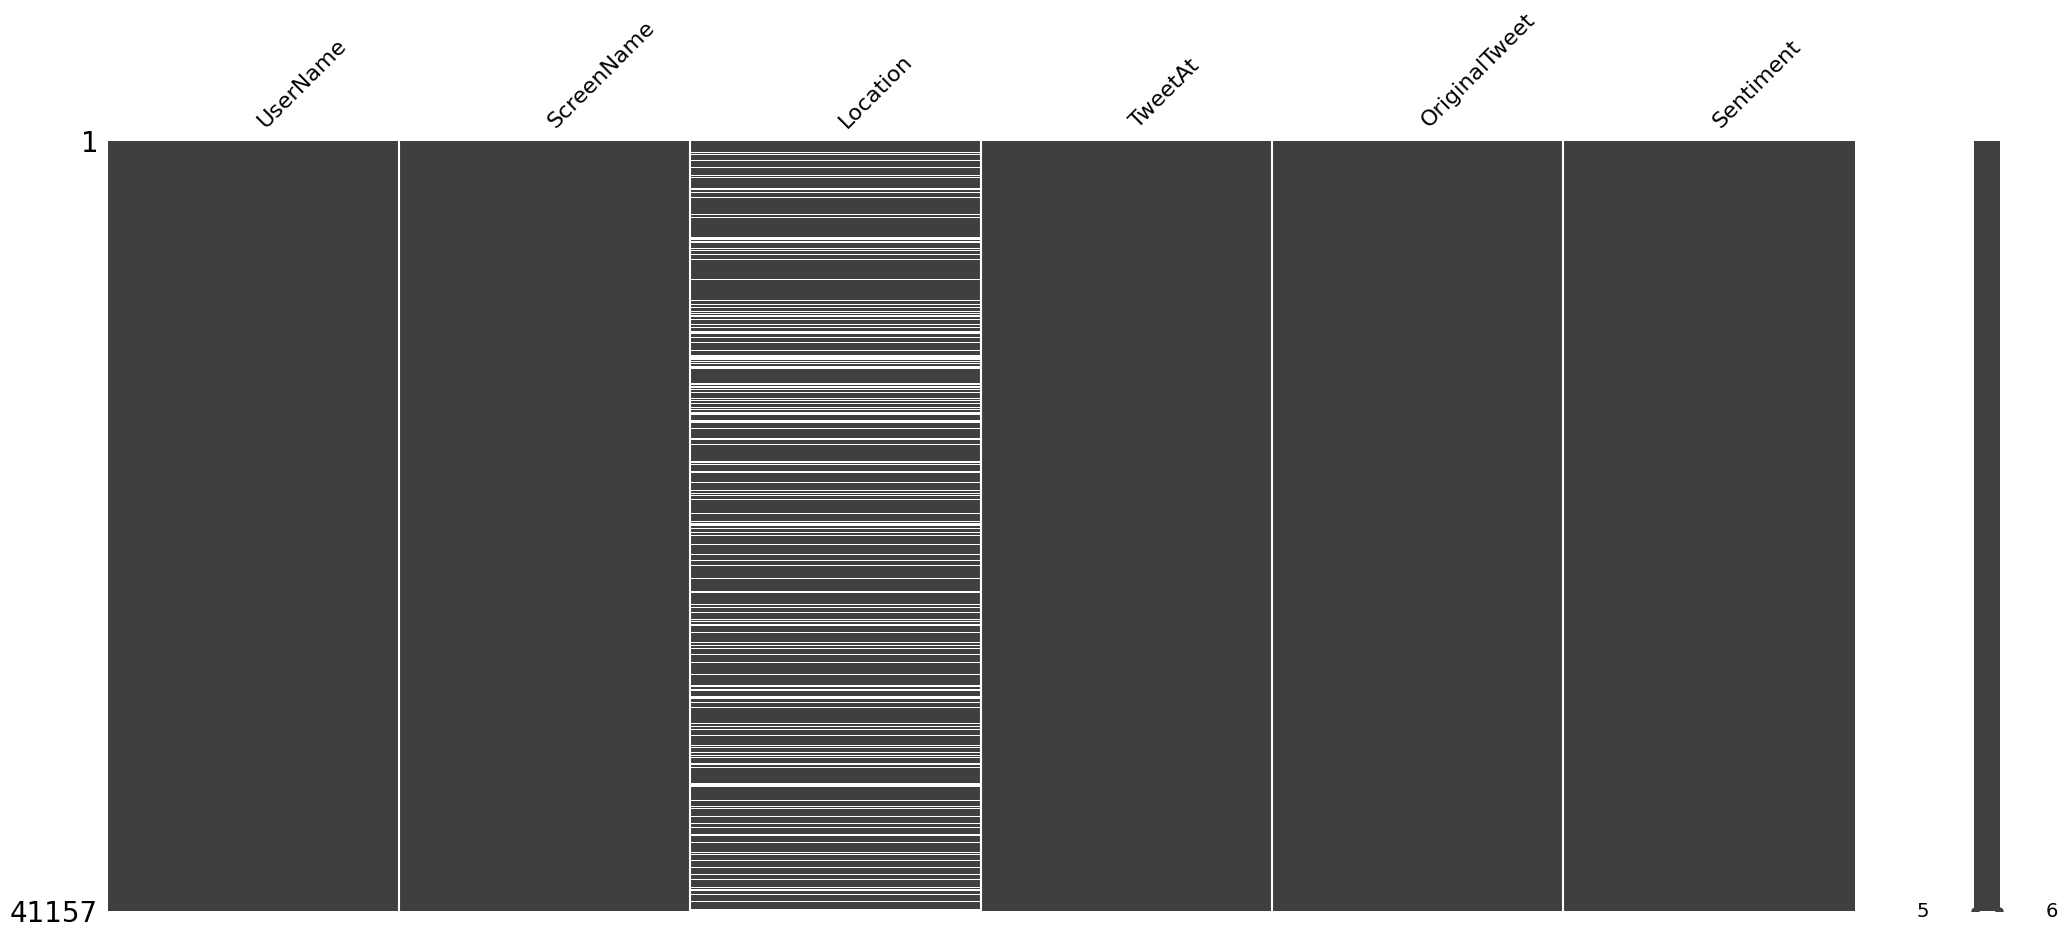

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.matrix(df)



*   we have seen 41157 rows and 6 columns and no duplicate and 8590 null value present in our location data .
*  Username: Coded username to ensure privacy.

*   ScreenName: Coded screen name for privacy protection.
*   Location: The region of origin of the tweet.

*  OriginalTweet: The content of the tweet.
*  Sentiment-Target variable: Sentiment of the tweet

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Drooping Null values from the dataset
df.dropna(inplace=True)

In [ ]:
# Dataset shape after dropping null rows
df.shape

(32567, 6)

In [ ]:
#check unique value featurewise
df.nunique()

UserName         32567
ScreenName       32567
Location         12220
TweetAt             30
OriginalTweet    32567
Sentiment            5
dtype: int64

In [ ]:
#checking duplicate rows
df.duplicated().sum()

0

In [ ]:
#unique Sentiments
df['Sentiment'].value_counts()

Positive              9110
Negative              7763
Neutral               6172
Extremely Positive    5273
Extremely Negative    4249
Name: Sentiment, dtype: int64

### What all manipulations have you done and insights you found?

*   we drop the null values.
*    12220 unique values in location and 32567 in original tweet.

*   There in no duplicate values.
*   There are total 5 unique sentiments.




## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
#unique sentiments count in our data
sentiment_count = df['Sentiment'].value_counts().reset_index()
sentiment_count.columns=['Sentiment','count']
sentiment_count

,Sentiment,count
0,Positive,9110
1,Negative,7763
2,Neutral,6172
3,Extremely Positive,5273
4,Extremely Negative,4249


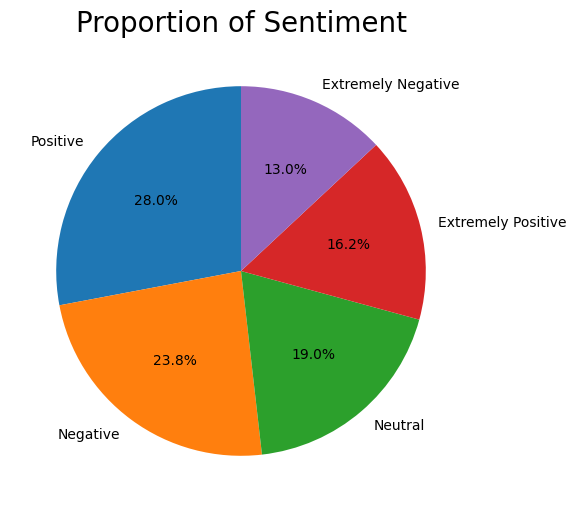

In [ ]:
#proportions for each sentiment category
plt.figure(figsize=(10, 6))
ax = plt.subplot()
# Calculate the proportions for each sentiment category
proportions = sentiment_count['count'] / sentiment_count['count'].sum()
# Create the pie chart
ax.pie(proportions, labels=sentiment_count['Sentiment'], autopct='%1.1f%%', startangle=90)
ax.set_title('Proportion of Sentiment', fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

This is a pie chart It is chosen to represent the proportion of each sentiment category in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The pie chart visually represents the distribution of sentiments in the dataset.
Each slice of the pie represents a sentiment category for EX. positive, negative, neutral.

The size of each slice corresponds to the proportion of tweets with that sentiment category in the dataset.

The percentages shown on each slice indicate the relative proportion of each sentiment category.


#### Chart - 2

In [ ]:
#top 10 location wise tweets
top_10_loc = df['Location'].value_counts().head(10)
top_10_loc_df = pd.DataFrame(top_10_loc)
top_10_loc_df.reset_index(inplace=True)
top_10_loc_df = top_10_loc_df.rename(columns={'index':'Location', 'Location':'Tweet_count'})
top_10_loc_df

,Location,Tweet_count
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
5,United Kingdom,337
6,"Los Angeles, CA",281
7,India,268
8,UK,232
9,Australia,225


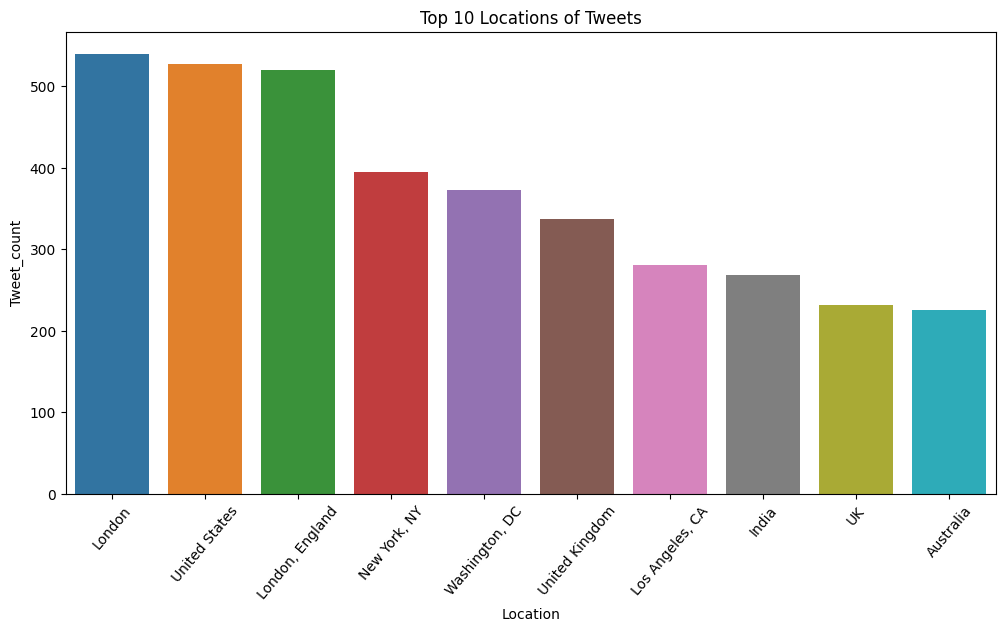

In [ ]:
#visualize top 10 location wise tweets
plt.subplots(figsize=(12, 6))
plt.title('Top 10 Locations of Tweets')
sns.barplot(x='Location', y='Tweet_count', data=top_10_loc_df)
plt.xticks(rotation=50)
plt.show()

##### 1. Why did you pick the specific chart?

Here we use bar plot. It is chosen to visualize the top 10 locations of tweets based on the tweet count.

##### 2. What is/are the insight(s) found from the chart?

Each bar represents a location, and its height corresponds to the tweet count for that location.

The x-axis represents the locations, and the y-axis represents the tweet count.

#### Chart - 3

In [ ]:
#checking unique value in TweetAt feature
df['TweetAt'].value_counts()

20-03-2020    2618
19-03-2020    2614
25-03-2020    2384
18-03-2020    2183
21-03-2020    2066
22-03-2020    1618
23-03-2020    1604
17-03-2020    1555
08-04-2020    1527
07-04-2020    1487
06-04-2020    1372
09-04-2020    1185
24-03-2020    1167
13-04-2020    1148
26-03-2020    1025
05-04-2020     880
10-04-2020     815
02-04-2020     779
11-04-2020     722
03-04-2020     656
04-04-2020     615
12-04-2020     593
16-03-2020     529
01-04-2020     503
27-03-2020     280
31-03-2020     253
14-04-2020     210
29-03-2020      95
30-03-2020      65
28-03-2020      19
Name: TweetAt, dtype: int64

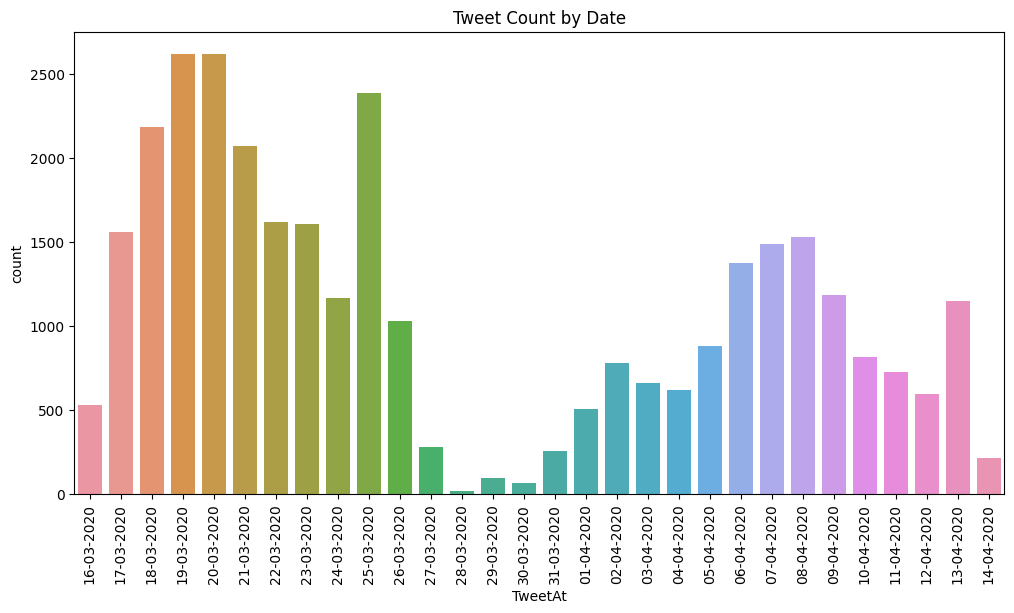

In [ ]:
#visualize tweet by date wise

plt.figure(figsize=(12, 6))
sns.countplot(x='TweetAt', data=df)
plt.xticks(rotation=90)
plt.title('Tweet Count by Date')
plt.show()

#### Chart - 4

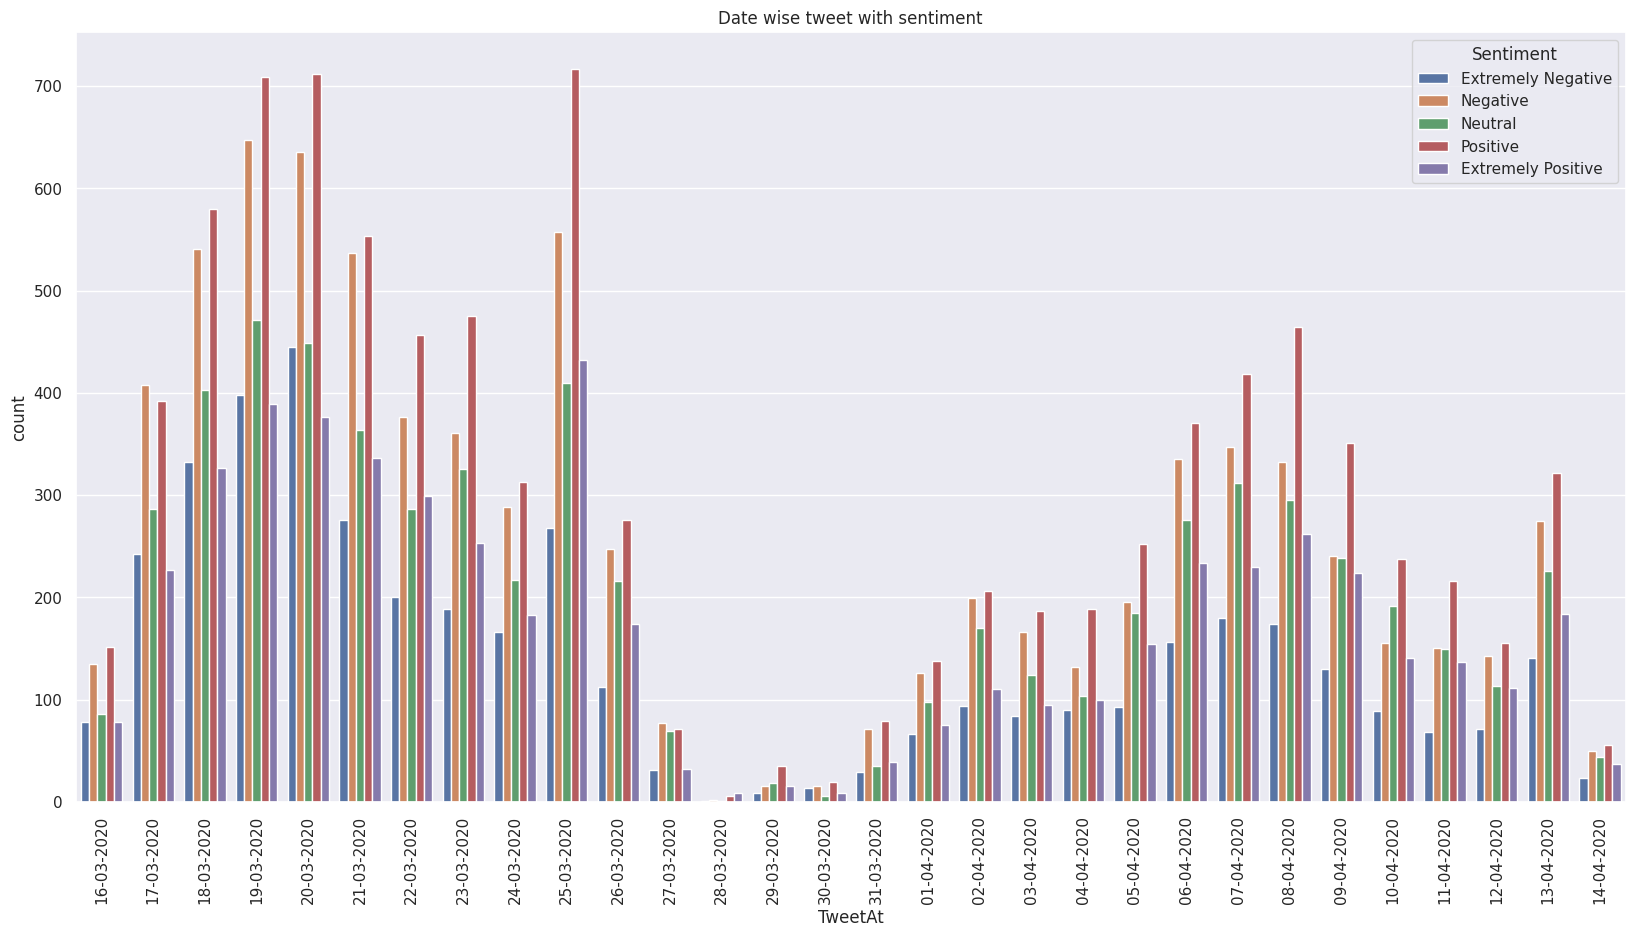

In [ ]:
#visualize tweet by date wise with Sentiment
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x='TweetAt',hue='Sentiment',data = df, hue_order=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'])
plt.title('Date wise tweet with sentiment')
plt.xticks(rotation = 90)
plt.show()

##### 1. Why did you pick the specific chart?

We use countplot. It is chosen to visualize the distribution of tweets by date, categorized by sentiment.

##### 2. What is/are the insight(s) found from the chart?

The countplot represents the number of tweets for each date, with different sentiment categories distinguished by different colors.

Each bar represents a date, and the height of the bar corresponds to the count of tweets for that date.

The color represents the sentiment category, allowing for easy comparison of sentiment distribution across dates.

#### Chart - 5

In [ ]:
#check unique value in Sentiment feature
df['Sentiment'].value_counts()

Positive              9110
Negative              7763
Neutral               6172
Extremely Positive    5273
Extremely Negative    4249
Name: Sentiment, dtype: int64

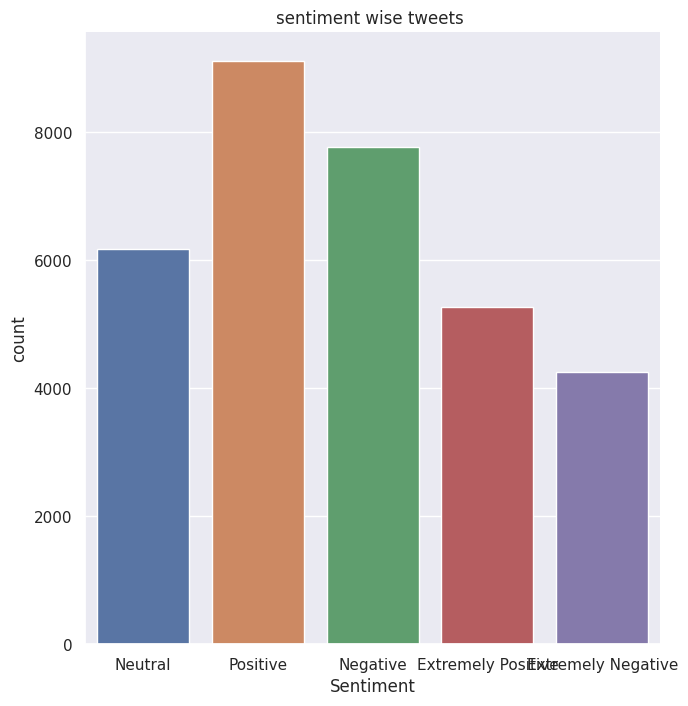

In [ ]:
# sentiment wise tweets
sns.catplot(x="Sentiment", kind="count", height=7, data=df)
plt.title("sentiment wise tweets ")
plt.show()


#### Chart - 6

In [ ]:
#Proportion of Sentiment
replace_values = {"Sentiment": {'Extremely Negative' : 'Negative', 'Extremely Positive' : 'Positive'}}
df= df.replace(replace_values)

In [ ]:
sentiment_count1 = df['Sentiment'].value_counts().reset_index()
sentiment_count1.columns=['Sentiment','count']
sentiment_count1

,Sentiment,count
0,Positive,14383
1,Negative,12012
2,Neutral,6172


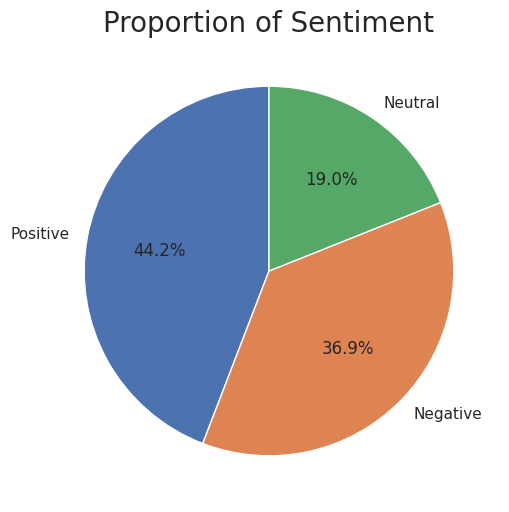

In [ ]:
plt.figure(figsize=(10, 6))
ax = plt.subplot()

# Calculate the proportions for each sentiment category
proportions = sentiment_count1['count'] / sentiment_count1['count'].sum()

# Create the pie chart
ax.pie(proportions, labels=sentiment_count1['Sentiment'], autopct='%1.1f%%', startangle=90)
ax.set_title('Proportion of Sentiment', fontsize=20)
plt.show()

#### Chart - 7

In [ ]:
# Top dates with maximum number of tweets
Tweet_count=df['TweetAt'].value_counts().reset_index().rename(columns = {'index':'Tweet_Date'})
Tweet_20=Tweet_count.sort_values(by='TweetAt',ascending=False).head(21)
print(Tweet_20)

    Tweet_Date  TweetAt
0   20-03-2020     2618
1   19-03-2020     2614
2   25-03-2020     2384
3   18-03-2020     2183
4   21-03-2020     2066
5   22-03-2020     1618
6   23-03-2020     1604
7   17-03-2020     1555
8   08-04-2020     1527
9   07-04-2020     1487
10  06-04-2020     1372
11  09-04-2020     1185
12  24-03-2020     1167
13  13-04-2020     1148
14  26-03-2020     1025
15  05-04-2020      880
16  10-04-2020      815
17  02-04-2020      779
18  11-04-2020      722
19  03-04-2020      656
20  04-04-2020      615


Text(0.5, 1.0, 'Top dates with maximum number of tweets')

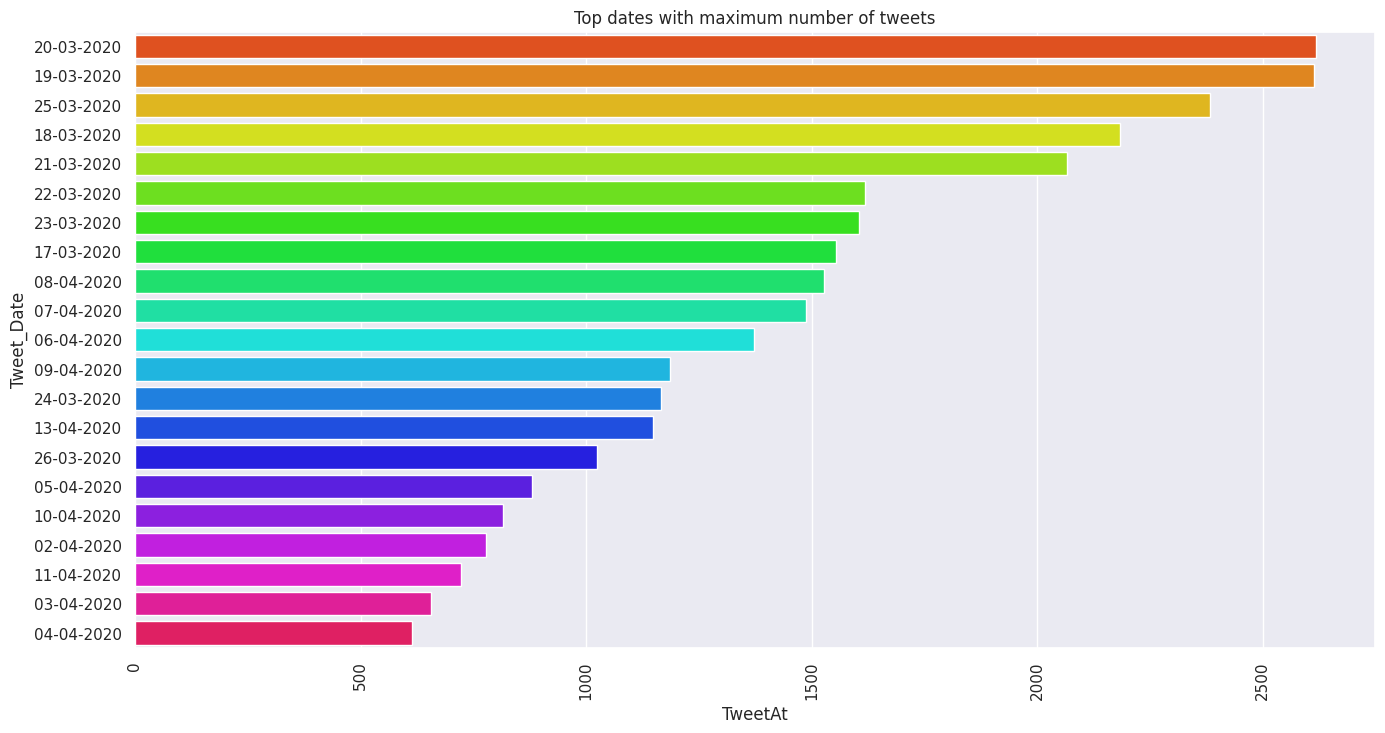

In [ ]:
#Top dates with maximum number of tweets
plt.figure(figsize=(16,8))
sns.barplot(data=Tweet_20, x="TweetAt",y="Tweet_Date",palette = ('hsv'))
plt.xticks(rotation=90)
plt.fontsize=12
plt.title('Top dates with maximum number of tweets')

#### Chart - 8

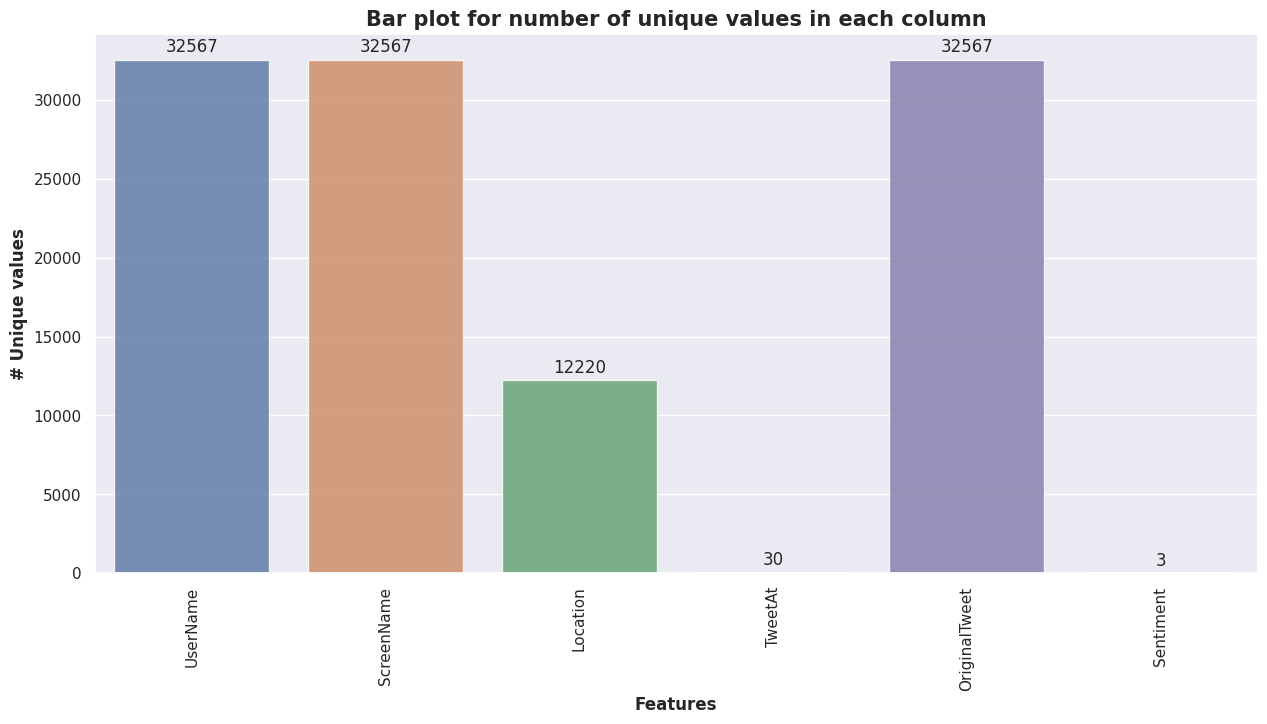

In [ ]:
# Bar plot for number of unique values in each column

unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique_df['Uniques'] = [df[col].nunique() for col in df.columns]

plt.figure(figsize=(15, 7))
sns.barplot(x='Features', y='Uniques', data=unique_df, alpha=0.8)
plt.title('Bar plot for number of unique values in each column', weight='bold', size=15)
plt.ylabel('# Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)

# Annotate each bar with the corresponding value
ax = plt.gca()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                va='center', xytext=(0, 9), textcoords='offset points')

plt.show()


#### Chart - 9

In [ ]:
#function for extracting hashtags
import re
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.extend(ht)  # Use extend instead of append to add individual elements
    return hashtags

# Counting total hashtags in the dataset
total_hashtags = hashtag_extract(df['OriginalTweet'])
print(f'{len(total_hashtags)} hashtags in the entire dataset')

64641 hashtags in the entire dataset


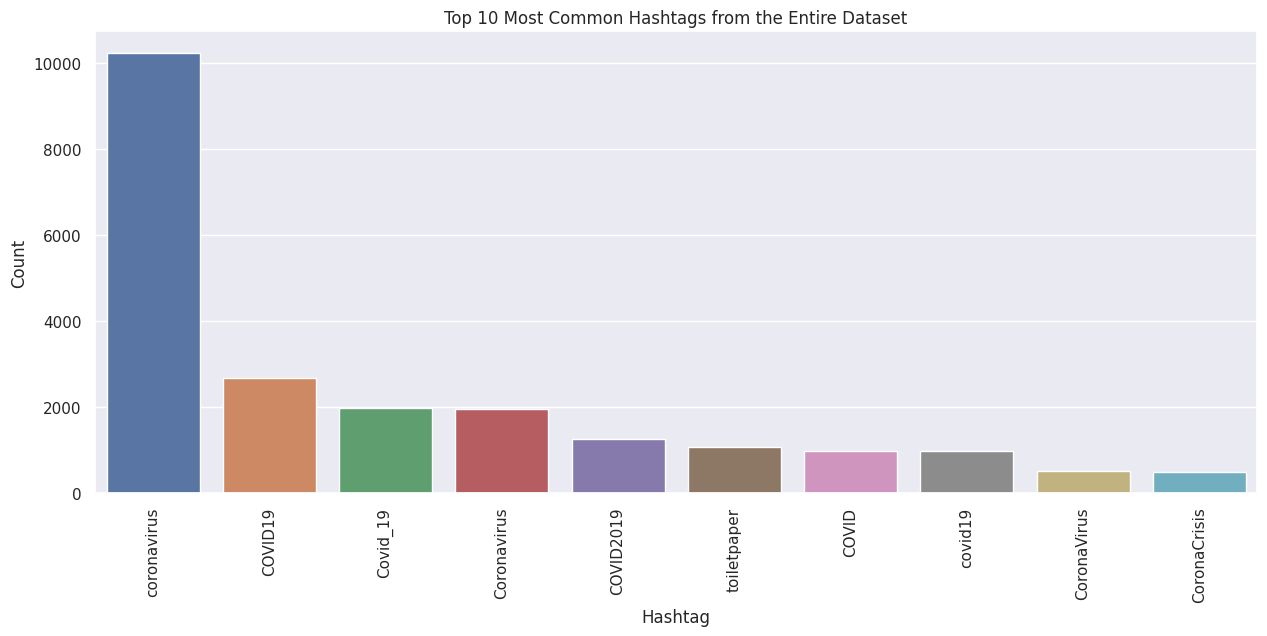

In [ ]:

# Calculate the frequency of each hashtag
hashtag_freq = nltk.FreqDist(total_hashtags)

# Create a DataFrame to store the hashtag frequencies
hashtag_freq_df = pd.DataFrame({'Hashtag': list(hashtag_freq.keys()), 'Count': list(hashtag_freq.values())})

# Get the top 10 most common hashtags
top_10_hashtag_freq = hashtag_freq_df.nlargest(10, 'Count')

# Plot the top 10 most common hashtags
plt.figure(figsize=(15, 6))
sns.barplot(x='Hashtag', y='Count', data=top_10_hashtag_freq)
plt.title('Top 10 Most Common Hashtags from the Entire Dataset')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
#Check for missing values
print(df.isnull().sum())


UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64


### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

 The variables 'UserName', 'ScreenName', and 'Location' are not likely to be relevant for detecting outliers or influencing the sentiment prediction. These variables represent identifiers and categorical information rather than numerical or continuous data.

### 3. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

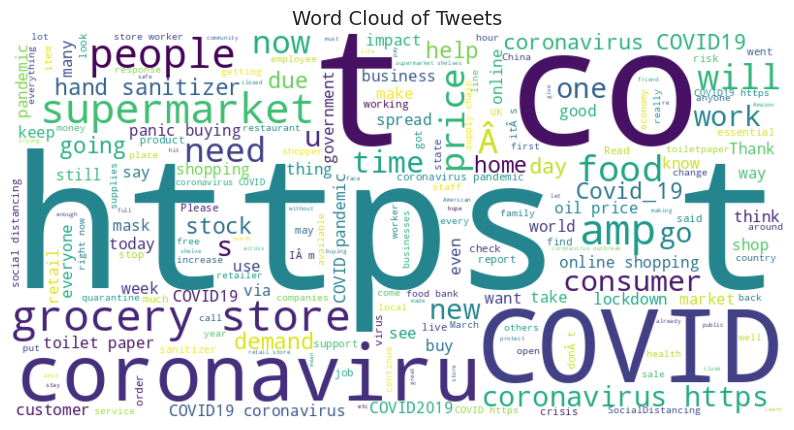

In [ ]:
# Concatenate all the tweet texts into a single string
from wordcloud import WordCloud
text = ' '.join(df['OriginalTweet'])
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets', size=14)
plt.show()


#### Removing Punctuations

In [ ]:
# Remove Punctuations
def remove_punc(text):
  ''' function to remove punctuation'''

  import string

  # replacing the punctuations with no space
  translator = str.maketrans('','', string.punctuation)

  # return the text stripped of punctuation marks
  return text.translate(translator)

In [ ]:
df['OriginalTweet'] = df['OriginalTweet'].apply(remove_punc)

In [ ]:
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,MeNyrbie PhilGahan Chrisitv httpstcoiFz9FAn2Pa...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia Woolworths to give elder...,Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
...,...,...,...,...,...,...
41147,44946,89898,"Brooklyn, NY",14-04-2020,YÂall really shitting that much more at home ...,Negative
41149,44948,89900,"Toronto, Ontario",14-04-2020,Still shocked by the number of Toronto superma...,Negative
41150,44949,89901,OHIO,14-04-2020,I never that weÂd be in a situation amp world...,Positive
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral


#### Removing Stopwords & Removing White spaces

In [ ]:
# Function to remove stopwords

stop_word = set(stopwords.words('english'))

def remove_stopwords(text):
  ''' function to remove stopwords'''
  ## make text smallcase and then remove stopwords
  text = [word.lower() for word in text.split() if word.lower() not in stop_word]

  # joining the list of words with space separator
  return " ".join(text)



In [ ]:
df['OriginalTweet'] = df['OriginalTweet'].apply(remove_stopwords)

In [ ]:
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,menyrbie philgahan chrisitv httpstcoifz9fan2pa...,Neutral
1,3800,48752,UK,16-03-2020,advice talk neighbours family exchange phone n...,Positive
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworths give elderly ...,Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,news regionâs first confirmed covid19 case ca...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,cashier grocery store sharing insights covid19...,Positive
...,...,...,...,...,...,...
41147,44946,89898,"Brooklyn, NY",14-04-2020,yâall really shitting much home covid19 coron...,Negative
41149,44948,89900,"Toronto, Ontario",14-04-2020,still shocked number toronto supermarket emplo...,Negative
41150,44949,89901,OHIO,14-04-2020,never weâd situation amp world going supermar...,Positive
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,airline pilots offering stock supermarket shel...,Neutral


#### Text Normalization

In [ ]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [ ]:
df['OriginalTweet']= df['OriginalTweet'].apply(stemming)

In [ ]:
df.head(8)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,menyrbi philgahan chrisitv httpstcoifz9fan2pa ...,Neutral
1,3800,48752,UK,16-03-2020,advic talk neighbour famili exchang phone numb...,Positive
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworth give elder dis...,Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,news regionâ first confirm covid19 case came ...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,cashier groceri store share insight covid19 pr...,Positive
7,3806,48758,Austria,16-03-2020,supermarket today didnt buy toilet paper rebel...,Neutral
8,3807,48759,"Atlanta, GA USA",16-03-2020,due covid19 retail store classroom atlanta ope...,Positive
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,corona preventionw stop buy thing cash use onl...,Negative


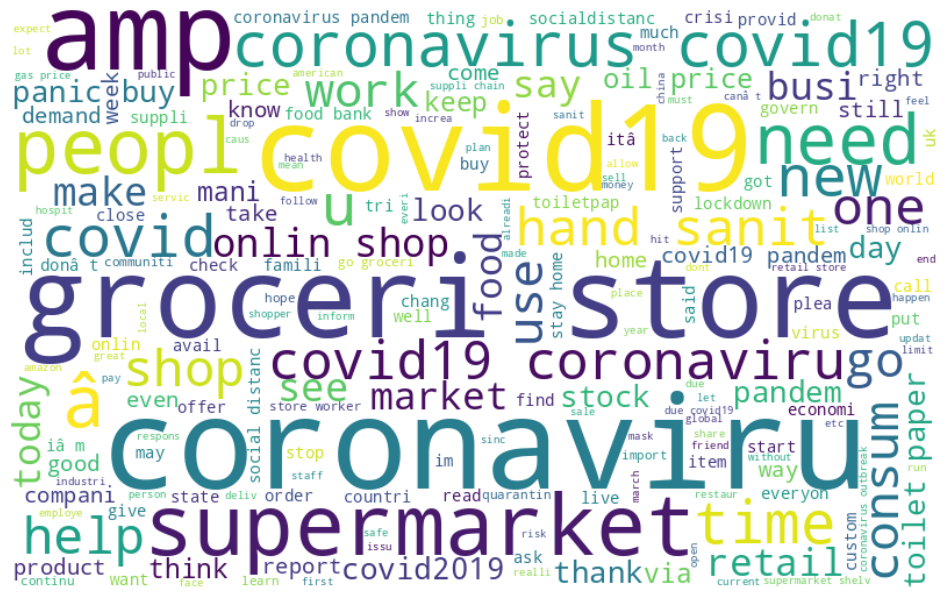

In [ ]:
# Wordcloud After removing punctuation, stopwords and usnig stemming to words
from wordcloud import WordCloud, STOPWORDS
all_words = ' '.join([str(text) for text in df['OriginalTweet']])
wordcloud = WordCloud(width=800,
                      height=500,
                      stopwords=set(STOPWORDS),
                      background_color="white",
                      random_state=21,
                      max_font_size=110).generate(all_words)
# Displaying the generated word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

##### Which text normalization technique have you used and why?

we used Stemming normalization technique .This technique is a process of reducing words to their base or root form by removing affixes and suffixes. the SnowballStemmer from the nltk library is used with the "english" language parameter.

The purpose of stemming is to reduce the variation of words and group together words that have the same root. It helps in reducing the dimensionality of the text data and can improve the efficiency of text analysis tasks such as text classification or information retrieval.

## ***Splitting data into train and test set***

In [ ]:
# Obtaining independent variables
X = df['OriginalTweet']

In [ ]:
# Obtaining dependent variable
y = df['Sentiment']

In [ ]:
# Splitting the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(26053,) (26053,) (6514,) (6514,)


## ***Vectorization***

In [ ]:
# Creating an object of TfidfVectorizer
tf_idf = TfidfVectorizer()

In [ ]:
# Applying tf idf to training and test data
X_train_tf = tf_idf.fit_transform(X_train)
X_test_tf = tf_idf.transform(X_test)

In [ ]:
# shape of our training and testing data
print(X_train_tf.shape)
print(X_test_tf.shape)
print(y_train.shape)
print(y_test.shape)

(26053, 53933)
(6514, 53933)
(26053,)
(6514,)


## ***7. ML Model Implementation***

### ML Model - 1. LOGISTIC REGRESSION

In [ ]:
LR = LogisticRegression(solver='lbfgs', max_iter = 10000)

In [ ]:
from sklearn.pipeline import Pipeline
model = Pipeline([('vectorizer',tf_idf),('classifier',LR)])
model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression(max_iter=10000))])

In [ ]:
## model prediction
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy :' ,accuracy_score(y_pred,y_test))
print('Precision :', precision_score(y_pred,y_test, average='weighted'))
print('Recall :', recall_score(y_pred,y_test, average='weighted'))

Accuracy : 0.7729505680073687
Precision : 0.7873354138023972
Recall : 0.7729505680073687


### ML Model - 2. Naive Bayes Classifier

In [ ]:
# Train the Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_tf, y_train)

# Make predictions on the test data
y_pred = naive_bayes.predict(X_test_tf)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.6228124040528094
Precision: 0.774881497760813
Recall: 0.49810691655929523


### ML Model - 3. SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

svc = SVC()

model4 = Pipeline([('vectorizer',tf_idf), ('classifier', svc)])
model4.fit(X_train, y_train)

y_pred_svc = model4.predict(X_test)


In [ ]:
print('Accuracy :' ,accuracy_score(y_pred_svc,y_test))
print('Precision :', precision_score(y_pred_svc,y_test, average='weighted'))
print('Recall :', recall_score(y_pred_svc,y_test, average='weighted'))

Accuracy : 0.7678845563401904
Precision : 0.7859840992241954
Recall : 0.7678845563401904


### ML Model - 4. RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

model5 = Pipeline([('vectorizer',tf_idf),('classifier',rf)])
model5.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
y_pred_rf = model5.predict(X_test)

In [ ]:
print('Accuracy :' ,accuracy_score(y_pred_rf,y_test))
print('Precision :', precision_score(y_pred_rf,y_test, average='weighted'))
print('Recall :', recall_score(y_pred_rf,y_test, average='weighted'))

Accuracy : 0.7319619281547436
Precision : 0.7383388225602563
Recall : 0.7319619281547436


## ***8.*** ***Future Work (Optional)***

### Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# predict unseen data.
Tweet = ['i will eat good food','covid virus is very bad','Doctors are are good', 'baby is looking sad',
         'she fell sick', 'she is not satisfied with his work',
        'he is angry with his behaviour', 'taste of food bad', 'lunch are good']
for tweet in Tweet:
    print("Tweet:", tweet)
    result = model.predict([tweet])
    print("Sentiment prediction:", result[0])
    print()

Tweet: i will eat good food
Sentiment prediction: Positive

Tweet: covid virus is very bad
Sentiment prediction: Negative

Tweet: Doctors are are good
Sentiment prediction: Positive

Tweet: baby is looking sad
Sentiment prediction: Negative

Tweet: she fell sick
Sentiment prediction: Negative

Tweet: she is not satisfied with his work
Sentiment prediction: Neutral

Tweet: he is angry with his behaviour
Sentiment prediction: Neutral

Tweet: taste of food bad
Sentiment prediction: Negative

Tweet: lunch are good
Sentiment prediction: Positive



### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project, we analyzed a dataset containing COVID-19-related tweets to predict the sentiment associated with each tweet. The dataset initially had 6 columns and 41,157 rows. After dropping the rows with missing values in the Location column, we were left with 32,567 rows and 6 columns.

To perform our analysis, we focused on the "OriginalTweet" and "Sentiment" columns, as they provided the most relevant information for our task. We dropped columns such as "UserName" and "ScreenName" since they did not contribute meaningful insights.

We identified five types of sentiments in the dataset: Extremely Negative, Negative, Neutral, Positive, and Extremely Positive. Most of the tweets were collected from London, followed by the United States.

We applied four machine learning models to predict the sentiment of the tweets: Logistic Regression, Naive Bayes Classifier, Support Vector Machine, and Random Forest.

Based on results, the Logistic Regression model achieved the highest accuracy and precision among the tested models. It performed relatively well in predicting the sentiment of the tweets.

In conclusion, our analysis demonstrates that machine learning models can effectively predict sentiment in COVID-19-related tweets. The Logistic Regression model showed the best performance in this project.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***